Collaborative Filtering
* Item-Item 
* Centered Cosine Similarity
* Top-k

https://www.ethanrosenthal.com/2015/11/02/intro-to-collaborative-filtering/

## Import Data 

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

r = pd.read_csv( '../ratings.csv' )

In [2]:
n_users = r.user_id.unique().shape[0]
n_books = r.book_id.unique().shape[0]
print(str(n_users) + ' users')
print(str(n_books) + ' books')

53424 users
10000 books


## Construct Matrix

In [3]:
import numpy as np

# id starts from 1, but python starts at 0
ratings = np.zeros((n_books, n_users))
for row in r.itertuples():
    ratings[row[2]-1, row[1]-1] = row[3]

In [4]:
def get_sparsity(ratings):
    sparsity = float(len(ratings.nonzero()[0]))
    sparsity /= (ratings.shape[0] * ratings.shape[1])
    sparsity *= 100
    return sparsity

In [5]:
print(f'Sparsity: {get_sparsity(ratings)}%')

Sparsity: 1.118688042827194%


## Only keep top 1000 books

In [6]:
N = 1000
book_index = np.argpartition(np.count_nonzero(ratings, axis=1), -N)[-N:]
print(len(book_index))

1000


In [7]:
ratings = ratings[book_index]

In [8]:
book_stat = np.count_nonzero(ratings, axis=1)
print('book stat')
print(f'min:  {book_stat.min()}\nmean: {book_stat.mean()}\nmax:  {book_stat.max()}')

book stat
min:  1183
mean: 3179.65
max:  22806


In [9]:
print(f'Sparsity: {get_sparsity(ratings)}%')

Sparsity: 5.951725816112609%


## Only keep top 10000 users

In [10]:
N = 10000
user_index = np.argpartition(np.count_nonzero(ratings, axis=0), -N)[-N:]
print(len(user_index))

10000


In [11]:
ratings = ratings[:, user_index]
ratings.shape

(1000, 10000)

user stat
min:  82
mean: 98.3166
max:  177


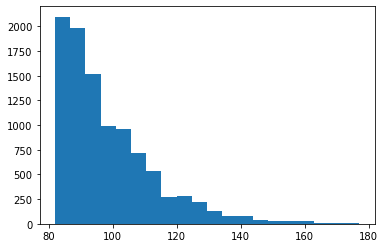

In [12]:
user_stat = np.count_nonzero(ratings, axis=0)
plt.hist(user_stat, bins=20)
print('user stat')
print(f'min:  {user_stat.min()}\nmean: {user_stat.mean()}\nmax:  {user_stat.max()}')

In [13]:
print(f'Sparsity: {get_sparsity(ratings)}%')

Sparsity: 9.831660000000001%


book stats
min:  49
mean: 983.166
max:  6034


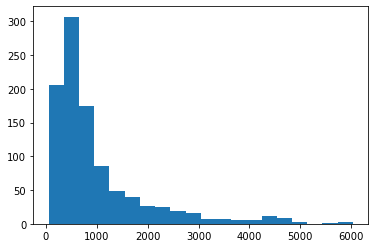

In [14]:
book_stat = np.count_nonzero(ratings, axis=1)
plt.hist(book_stat, bins=20)
print('book stats')
print(f'min:  {book_stat.min()}\nmean: {book_stat.mean()}\nmax:  {book_stat.max()}')

## Save Result to File

In [16]:
np.savez('rating.npz', 
         book_index=book_index, 
         user_index=user_index, 
         ratings=ratings)